<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/psm_ipwt_mah_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_nsw = pd.read_stata('/content/nsw_mixtape.dta')

In [4]:
print(df_nsw.shape)

(445, 11)


In [5]:
df_nsw.head()

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886


In [6]:
df_nsw['treat'].value_counts()

,count
treat,
0.0,260
1.0,185


In [7]:
df_nsw.describe()

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
count,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.41573,25.370787,10.195505,0.833708,0.087640,0.168539,0.782022,2102.265381,1377.138306,5300.764160
std,0.49340,7.100285,1.792119,0.372761,0.283089,0.374765,0.413338,5363.584961,3150.956787,6631.500000
min,0.00000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,20.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.00000,24.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3701.812012
75%,1.00000,28.000000,11.000000,1.000000,0.000000,0.000000,1.000000,824.388916,1220.836060,8124.714844
max,1.00000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,39570.679688,25142.240234,60307.929688


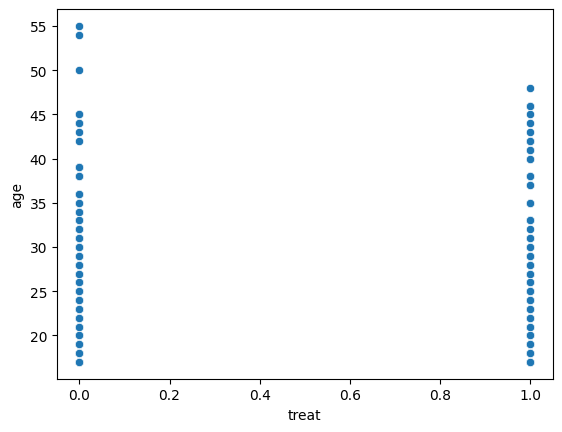

In [8]:
sns.scatterplot(x='treat', y='age', data=df_nsw)
plt.show()

In [9]:
df_cps = pd.read_stata('/content/cps_mixtape.dta')

In [10]:
df_cps.head(2)

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,CPS1,0,45,11,0,0,1,1,21516.669922,25243.550781,25564.669922
1,CPS1,0,21,14,0,0,0,0,3175.970947,5852.564941,13496.080078


In [11]:
sample = df_cps.sample(300)

In [12]:
sample.head()

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
10724,CPS1,0,39,2,0,1,1,1,0.000000,3931.548096,171.416306
15591,CPS1,0,53,12,0,0,1,0,5695.588867,11329.160156,0.000000
88,CPS1,0,45,12,0,0,1,0,24185.189453,25243.550781,0.000000
6045,CPS1,0,22,12,1,0,0,0,0.000000,0.000000,0.000000
9913,CPS1,0,55,10,1,0,1,1,15597.719727,14465.809570,12946.360352


In [13]:
df_nsw.head()

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886


In [14]:
df = pd.concat([df_nsw.drop(['data_id' , 're78'], axis = 1),sample.drop(['data_id' , 're78'],axis=1)])

In [20]:
Y = df['treat']
X = df.drop(['treat'],axis = 1)

In [ ]:

#features
X['agsq'] = X['age']**2
X['agecube'] = X['age']**3
X['educsq'] = X['educ']**2
X['interaction1'] = X['educ'] * X['re74']
X['interaction2'] = X['u74'] * X['hisp']
X['re74sq'] = X['re74']**2
X['re75sq'] = X['re75']**2

In [21]:
X['u74'] = np.where(X['re74'] == 0,1,0)
X['u75'] = np.where(X['re75'] == 0,1,0)
X['log_age'] = (X['age'] - X['age'].min())/(X['age'].max() - X['age'].min())
X['log_educ'] = (X['educ'] - X['educ'].min())/(X['educ'].max() - X['educ'].min())

In [22]:
X = X.drop(['re74','re75','age','educ'],axis = 1)

In [23]:
X.head()

,black,hisp,marr,nodegree,u74,u75,log_age,log_educ
0,1.0,0.0,1.0,1.0,1,1,0.538462,0.611111
1,0.0,1.0,0.0,1.0,1,1,0.153846,0.500000
2,1.0,0.0,0.0,0.0,1,1,0.358974,0.666667
3,1.0,0.0,0.0,1.0,1,1,0.282051,0.611111
4,1.0,0.0,0.0,1.0,1,1,0.435897,0.444444


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X,Y)
Y_hat = log_reg.predict_proba(X)


In [30]:
y_p = np.where([Y_hat[:,1] > 0.3],1,0).flatten()

In [31]:
confusion_matrix(Y,y_p)

array([[356, 204],
       [ 49, 136]])

In [32]:
X_pred = df_cps.drop(['data_id' , 're78','treat'],axis=1)

In [33]:
X_pred['u74'] = np.where(X_pred['re74'] == 0,1,0)
X_pred['u75'] = np.where(X_pred['re75'] == 0,1,0)
X_pred['log_age'] = (X_pred['age'] - X_pred['age'].min()) / (X_pred['age'].max() - X_pred['age'].min())
X_pred['log_educ'] = (X_pred['educ'] - X_pred['educ'].min()) / (X_pred['educ'].max() - X_pred['educ'].min())
X_pred = X_pred.drop(['re74','re75','age','educ'],axis = 1)

In [34]:
y_cps = log_reg.predict_proba(X_pred)
y_lables = np.where(y_cps[:,1] > 0.3,1,0)

In [35]:
df_cps['treat'] = y_lables
df_cps.value_counts('treat')

,count
treat,
0,15559
1,433


In [36]:
from sklearn.decomposition import PCA

In [37]:
df_treatment_cps = df_cps[df_cps['treat'] == 1]
df_treatment_nsw = df_nsw[df_nsw['treat'] == 1]
X_pca = pd.concat([df_treatment_cps.drop(['treat'],axis=1),df_treatment_nsw.drop(['treat'],axis=1)])
labels = X_pca['data_id']
X_pca = X_pca.drop(['data_id'],axis=1)
X_pca.head()

,age,educ,black,hisp,marr,nodegree,re74,re75,re78
25,26.0,17.0,1.0,0.0,1.0,0.0,0.000000,0.000000,4753.846191
38,17.0,8.0,1.0,0.0,0.0,1.0,0.000000,451.161285,0.000000
84,29.0,11.0,1.0,0.0,0.0,1.0,14743.480469,14954.559570,13714.780273
165,32.0,16.0,1.0,0.0,0.0,0.0,17135.750000,1031.225952,0.000000
239,23.0,13.0,1.0,0.0,0.0,0.0,172.415497,272.128998,582.224304


In [38]:
pca = PCA(n_components=2)
pca.fit(X_pca)
coords = pca.transform(X_pca)

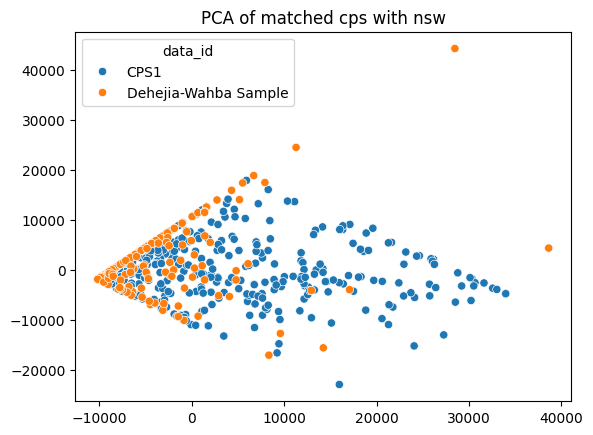

In [39]:
sns.scatterplot(x=coords[:,0],y=coords[:,1] , hue=labels)
plt.title("PCA of matched cps with nsw")
plt.show()

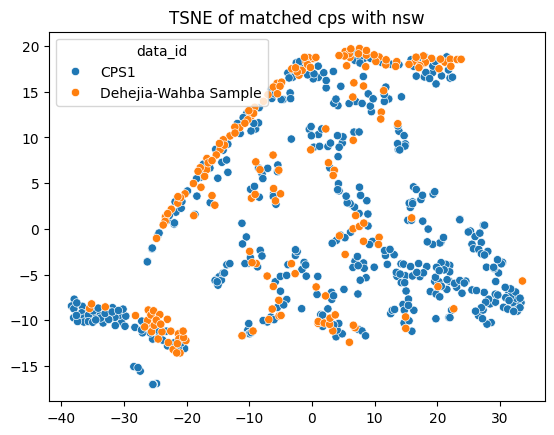

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
coords = tsne.fit_transform(X_pca)
sns.scatterplot(x=coords[:,0],y=coords[:,1] , hue=labels)
plt.title("TSNE of matched cps with nsw")
plt.show()

mahalanobis distance



In [41]:
u_vector = np.array(df_nsw.drop(['data_id','treat'], axis = 1).mean())
covariance_matrix = df_cps.drop(['data_id','treat'], axis = 1).cov().values
mah_X = df_cps.drop(['data_id','treat'], axis = 1).values
u_vector = u_vector.reshape(9,)
print(f"covaraince shape->{covariance_matrix.shape}")
print(f"data shape->{mah_X.shape}")
print(f"mean shape->{u_vector.shape}")

covaraince shape->(9, 9)
data shape->(15992, 9)
mean shape->(9,)


In [42]:
def mahalanobis(X=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the mu"""

    inv_covmat = np.linalg.inv(cov)
    distances = np.einsum('ij,jk,ik->i',X,inv_covmat,X)
    return np.sqrt(distances)


In [43]:
centered = mah_X - u_vector
d = mahalanobis(centered,covariance_matrix)

In [46]:
mean = np.mean(d)
std = np.std(d)

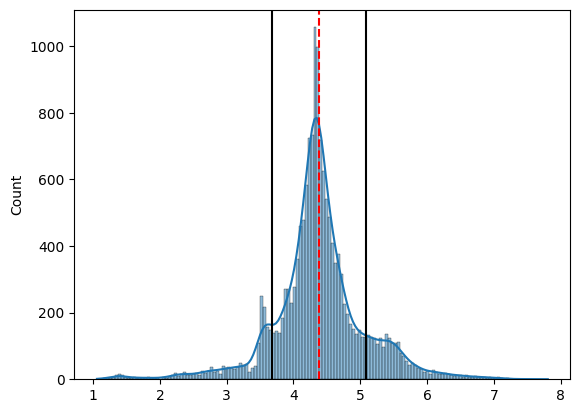

In [47]:
sns.histplot(d,kde=True)
plt.axvline(mean,color='red',linestyle='--')
plt.axvline(mean+std,color='black')
plt.axvline(mean-std,color='black')
plt.show()

In [48]:
df_cps['mah_distance'] = d
df_cps.head()

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,mah_distance
0,CPS1,0,45,11,0,0,1,1,21516.669922,25243.550781,25564.669922,4.467786
1,CPS1,0,21,14,0,0,0,0,3175.970947,5852.564941,13496.080078,3.697649
2,CPS1,0,38,12,0,0,1,0,23039.019531,25130.759766,25564.669922,4.351132
3,CPS1,0,48,6,0,0,1,1,24994.369141,25243.550781,25564.669922,4.720336
4,CPS1,0,18,8,0,0,1,1,1669.295044,10727.610352,9860.869141,4.720809


In [68]:
nearest_points_3 = df_cps[df_cps['mah_distance'] < 2.5]

In [62]:
nearest_points_2 = df_cps[df_cps['mah_distance'] < 2]
nearest_points_2.shape

(118, 12)

In [58]:
df_nsw.head(1)

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898


In [69]:
nearest_points_3_nsw = pd.concat([
    nearest_points_3.drop(['treat', 'mah_distance'], axis=1),
    df_nsw[df_nsw['treat'] == 1].drop(columns=['treat'])
])

nearest_points_2_nsw = pd.concat([
    nearest_points_2.drop(['treat', 'mah_distance'], axis=1),
    df_nsw[df_nsw['treat'] == 1].drop(columns=['treat'])
])

In [70]:
tsne2 = TSNE(n_components=2)
tsne3 = TSNE(n_components=2)
coords2 = tsne2.fit_transform(nearest_points_2_nsw.drop(['data_id'], axis=1))
coords3 = tsne3.fit_transform(nearest_points_3_nsw.drop(['data_id'], axis=1))

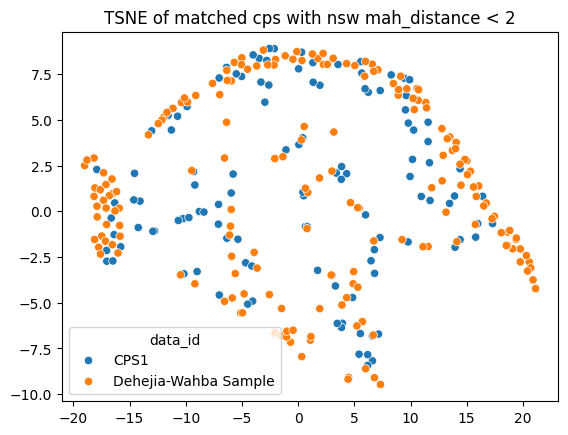

In [66]:
sns.scatterplot(x=coords2[:,0],y=coords2[:,1],hue = nearest_points_2_nsw['data_id'])
plt.title("TSNE of matched cps with nsw mah_distance < 2")
plt.show()

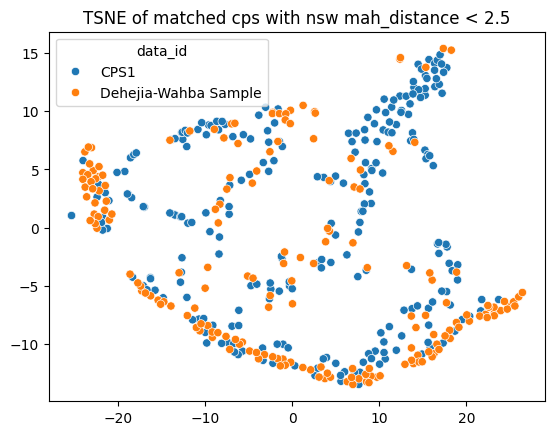

In [72]:
sns.scatterplot(x=coords3[:,0],y=coords3[:,1],hue = nearest_points_3_nsw['data_id'])
plt.title("TSNE of matched cps with nsw mah_distance < 2.5")
plt.show()